In [1]:
# Importaciones
import gdown
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import contextily as ctx

In [2]:
# Descargamos el CSV
gdown.download('https://drive.google.com/uc?id=1k3ZsPxeWM2PKejf_GZyja2A5sFSBZLzy', 'Real_Estate_Madrid.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k3ZsPxeWM2PKejf_GZyja2A5sFSBZLzy
To: c:\Users\Sora\Downloads\Real_Estate_Madrid.csv
100%|██████████| 11.9M/11.9M [00:00<00:00, 20.6MB/s]


'Real_Estate_Madrid.csv'

In [3]:
# Cargo el archivo csv en un DataFrame de Pandas y compruebo las primeras filas
real_state = pd.read_csv('c:/Users/Sora/Desktop/Real_Estate_Madrid.csv') # Reemplazar con la ruta correspondiente
real_state = pd.DataFrame(real_state)
real_state.head()

C:\Users\Sora\AppData\Local\Temp\ipykernel_3588\3217697928.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  real_state = pd.read_csv('c:/Users/Sora/Desktop/Real_Estate_Madrid.csv') # Reemplazar con la ruta correspondiente


Id  Precio            Tipo  \
0                piso-zona_noreste-9850724244_109700  288900            Piso   
1             piso-chorrillo28806-98411299789_994398  121890            Piso   
2      piso-valleaguado_la_canada-89208496159_501036  247000            Piso   
3  casa_adosada-daganzo_de_arriba_centro_urbano-9...  290000  Chalet adosado   
4       chalet-meco_centro_urbano-99216245118_995907  298000          Chalet   

                      Anunciante         Actualización  Duración  Superficie  \
0        premier_espana_991481_0  2019-10-16T00:00:00Z        43         135   
1     selene_inmoalcala_994398_0  2019-11-19T00:00:00Z         9          80   
2  inmobiliaria_olimpus_501036_0  2019-11-19T00:00:00Z         9         117   
3           gavilan_inmobiliaria  2019-09-19T00:00:00Z        70         156   
4                  avance_urbano  2019-11-07T00:00:00Z        21         222   

   Superficie útil  Superficie solar  Habitaciones  ...  gx_Dem_Casados_pct  \
0              135               135             4  ...           54.260090   
1               75                80             3  ...           34.567901   
2              107               117             4  ...           51.479290   
3              150               240             3  ...           44.362745   
4              190               222             4  ...           40.267176   

   gx_Dem_Edad  gx_Dem_Nivel_Estudios  gx_Dem_Vivienda_m2  \
0           41               2.825243                 NaN   
1           47               2.054795                 NaN   
2           38               2.940659           89.307453   
3           30               3.092527          116.411184   
4           34               3.137019           78.225753   

  gx_Dem_Personas_Hogar gx_Dem_Location_Idx Segmentos Precios  Precio_pxHC  \
0                   NaN            4.460739   [Precios Altos]     288900.0   
1                   NaN            5.044444   [Precios Bajos]     121890.0   
2              3.218750            5.005148   [Precios Bajos]     247000.0   
3              3.000000            4.970623   [Precios Altos]     290000.0   
4              2.457547            5.560000   [Precios Altos]     298000.0   

                Referencia                                   Calle  
0         4991481-15166109  Calle Budapest Frente A C/ Rioja,  S/N  
1          4994398-PS14516                                     NaN  
2            501036-010012                                     NaN  
3               SA114-0513                         Calle La Picaza  
4  4995907-2 ÚNICOS CHALET                          Calle Alemania  

[5 rows x 74 columns]

In [4]:
# El método heads() no devuelve todas las columnas, por lo que, para poder obtener el título de todas las columnas, voy a usar el método .columns
real_state.columns

Index(['Id', 'Precio', 'Tipo', 'Anunciante', 'Actualización', 'Duración',
       'Superficie', 'Superficie útil', 'Superficie solar', 'Habitaciones',
       'Baños', 'Planta', 'Antigüedad', 'Clasificación', 'Barrio', 'Distrito',
       'Localidad', 'Código postal', 'Latitud', 'Longitud', 'Nuevo',
       'Reformado', 'Conservado', 'Exterior', 'Orientación sur', 'Soleado',
       'Amueblado', 'Negociar muebles', 'Cocina equipada',
       'Cocina independiente', 'Armarios empotrados', 'Garaje', 'Terraza',
       'Ascensor', 'Aire acondicionado', 'Trastero', 'Puerta blindada',
       'Piscina', 'Jardín', 'Comedor', 'Balcón', 'Lavadero', 'Chimenea',
       'Portero automático', 'Sistema de seguridad', 'Calefacción central',
       'Calefacción eléctrica', 'Gas natural', 'Gasoil', 'Aluminio', 'PVC',
       'Climalit', 'Madera', 'Parquet', 'Gres', 'Tarima', 'Mármol',
       'Precio_Var7', 'Precio_4L4r', 'Superficie_FXCm', 'Precio_xQ0N',
       'month_name', 'weekday_name', 'gx_Dem_Extranjeros

In [5]:
# Compruebo el número de filas y columnas gracias a .shape 
real_state.shape

(26026, 74)

In [6]:
# Para poder comprobar el formato de los datos de las variables, voy a usar .info
real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26026 entries, 0 to 26025
Data columns (total 74 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      26026 non-null  object 
 1   Precio                  26026 non-null  int64  
 2   Tipo                    26026 non-null  object 
 3   Anunciante              24689 non-null  object 
 4   Actualización           26026 non-null  object 
 5   Duración                26026 non-null  int64  
 6   Superficie              26026 non-null  int64  
 7   Superficie útil         26026 non-null  int64  
 8   Superficie solar        26026 non-null  int64  
 9   Habitaciones            26026 non-null  int64  
 10  Baños                   26026 non-null  int64  
 11  Planta                  26026 non-null  int64  
 12  Antigüedad              26026 non-null  int64  
 13  Clasificación           26026 non-null  int64  
 14  Barrio                  11163 non-null

In [7]:
# Utilizo .describe() para visualizar las estadísticas principales de la distribución de los datos
pd.set_option('display.max_columns', 74) # Esta opción me permite ver todas las columnas
pd.set_option('display.float_format', '{:.2f}'.format) # Elimina la notación científica, me deja 2 decimales para hacerlo más legible
real_state.describe()

Precio  Duración  Superficie  Superficie útil  Superficie solar  \
count    26026.00  26026.00    26026.00         26026.00          26026.00   
mean    438973.18     66.53      170.40           162.46            293.11   
std     626618.65     91.62      178.97           175.01           2171.25   
min      20000.00      9.00       12.00            12.00             12.00   
25%     160000.00     15.00       79.00            74.00             79.00   
50%     259900.00     32.00      110.00           103.00            111.00   
75%     459900.00     74.00      202.00           193.00            222.75   
max   17000000.00   2535.00     5504.00          5504.00         261000.00   

       Habitaciones    Baños   Planta  Antigüedad  Clasificación  \
count      26026.00 26026.00 26026.00    26026.00       26026.00   
mean           3.26     2.18     0.80        4.28           4.67   
std            1.46     1.42     0.67        1.23           0.96   
min            1.00     1.00    -1.00        1.00           1.00   
25%            2.00     1.00     0.00        3.00           4.00   
50%            3.00     2.00     1.00        5.00           5.00   
75%            4.00     3.00     1.00        5.00           5.00   
max           20.00    32.00     3.00        6.00           7.00   

       Código postal  Latitud  Longitud    Nuevo  Reformado  Conservado  \
count       14332.00 26026.00  26026.00 26026.00   26026.00    26026.00   
mean        28233.07    40.43     -3.73     0.11       0.06        0.64   
std           342.99     0.14      0.20     0.31       0.23        0.48   
min         28001.00    40.02     -4.51     0.00       0.00        0.00   
25%         28017.00    40.36     -3.83     0.00       0.00        0.00   
50%         28036.00    40.43     -3.70     0.00       0.00        1.00   
75%         28292.00    40.48     -3.63     0.00       0.00        1.00   
max         28983.00    41.13     -3.09     1.00       1.00        1.00   

       Exterior  Orientación sur  Soleado  Amueblado  Negociar muebles  \
count  26026.00         26026.00 26026.00   26026.00          26026.00   
mean       0.49             0.17     0.12       0.09              0.00   
std        0.50             0.38     0.33       0.28              0.05   
min        0.00             0.00     0.00       0.00              0.00   
25%        0.00             0.00     0.00       0.00              0.00   
50%        0.00             0.00     0.00       0.00              0.00   
75%        1.00             0.00     0.00       0.00              0.00   
max        1.00             1.00     1.00       1.00              1.00   

       Cocina equipada  Cocina independiente  Armarios empotrados   Garaje  \
count         26026.00              26026.00             26026.00 26026.00   
mean              0.22                  0.05                 0.48     0.45   
std               0.42                  0.22                 0.50     0.50   
min               0.00                  0.00                 0.00     0.00   
25%               0.00                  0.00                 0.00     0.00   
50%               0.00                  0.00                 0.00     0.00   
75%               0.00                  0.00                 1.00     1.00   
max               1.00                  1.00                 1.00     1.00   

       Terraza  Ascensor  Aire acondicionado  Trastero  Puerta blindada  \
count 26026.00  26026.00            26026.00  26026.00         26026.00   
mean      0.44      0.44                0.34      0.32             0.31   
std       0.50      0.50                0.47      0.47             0.46   
min       0.00      0.00                0.00      0.00             0.00   
25%       0.00      0.00                0.00      0.00             0.00   
50%       0.00      0.00                0.00      0.00             0.00   
75%       1.00      1.00                1.00      1.00             1.00   
max       1.00      1.00                1.00     

In [8]:
# Compruebo si hay algún valor nulo usando .isnull.sum()
nulos = real_state.isnull().sum()
pd.set_option('display.max_rows', 74) # Esta opción me permite mostrar todas las filas
print(nulos)

''' Habiendo podido ver los datos nulos, decido que voy a eliminar la Calle, ya que constituye casi la mitad de los registros, y podría afectar al entrenamiento '''

Id                            0
Precio                        0
Tipo                          0
Anunciante                 1337
Actualización                 0
Duración                      0
Superficie                    0
Superficie útil               0
Superficie solar              0
Habitaciones                  0
Baños                         0
Planta                        0
Antigüedad                    0
Clasificación                 0
Barrio                    14863
Distrito                   5129
Localidad                     0
Código postal             11694
Latitud                       0
Longitud                      0
Nuevo                         0
Reformado                     0
Conservado                    0
Exterior                      0
Orientación sur               0
Soleado                       0
Amueblado                     0
Negociar muebles              0
Cocina equipada               0
Cocina independiente          0
Armarios empotrados           0
Garaje  

' Habiendo podido ver los datos nulos, decido que voy a eliminar la Calle, ya que constituye casi la mitad de los registros, y podría afectar al entrenamiento '

In [9]:
# Pongo la información de los nulos en forma de tabla, distribuido por columnas 
nulos = real_state.isnull().sum()
nulos_tabla = pd.DataFrame(nulos, columns=['Total de Nulos']).transpose()
pd.set_option('display.max_columns', 74) # Esta opción me permite ver todas las columnas
nulos_tabla

Id  Precio  Tipo  Anunciante  Actualización  Duración  \
Total de Nulos   0       0     0        1337              0         0   

                Superficie  Superficie útil  Superficie solar  Habitaciones  \
Total de Nulos           0                0                 0             0   

                Baños  Planta  Antigüedad  Clasificación  Barrio  Distrito  \
Total de Nulos      0       0           0              0   14863      5129   

                Localidad  Código postal  Latitud  Longitud  Nuevo  Reformado  \
Total de Nulos          0          11694        0         0      0          0   

                Conservado  Exterior  Orientación sur  Soleado  Amueblado  \
Total de Nulos           0         0                0        0          0   

                Negociar muebles  Cocina equipada  Cocina independiente  \
Total de Nulos                 0                0                     0   

                Armarios empotrados  Garaje  Terraza  Ascensor  \
Total de Nulos                    0       0        0         0   

                Aire acondicionado  Trastero  Puerta blindada  Piscina  \
Total de Nulos                   0         0                0        0   

                Jardín  Comedor  Balcón  Lavadero  Chimenea  \
Total de Nulos       0        0       0         0         0   

                Portero automático  Sistema de seguridad  Calefacción central  \
Total de Nulos                   0                     0                    0   

                Calefacción eléctrica  Gas natural  Gasoil  Aluminio  PVC  \
Total de Nulos                      0            0       0         0    0   

                Climalit  Madera  Parquet  Gres  Tarima  Mármol  Precio_Var7  \
Total de Nulos         0       0        0     0       0       0         1979   

                Precio_4L4r  Superficie_FXCm  Precio_xQ0N  month_name  \
Total de Nulos         1979             6795         1979           0   

                weekday_name  gx_Dem_Extranjeros_pct  gx_Dem_Casados_pct  \
Total de Nulos             0                       0                   0   

                gx_Dem_Edad  gx_Dem_Nivel_Estudios  gx_Dem_Vivienda_m2  \
Total de Nulos            0                     22               13585   

                gx_Dem_Personas_Hogar  gx_Dem_Location_Idx  Segmentos Precios  \
Total de Nulos                   3311                    1                  0   

                Precio_pxHC  Referencia  Calle  
Total de Nulos         1952           1  11966

In [12]:
# Convierto la columna Precio de Texto a Número 
real_state['Precio'] = pd.to_numeric(real_state['Precio'], errors='coerce')

# Elimino las filas con valores nulos en columnas clave 
real_state.dropna(subset=['Precio', 'Superficie', 'Habitaciones'], inplace=True)

# Elimino posibles filas duplicadas 
real_state.drop_duplicates(inplace=True)

In [15]:
# Compruebo si se ha eliminado alguna fila 
real_state.shape

(26026, 74)

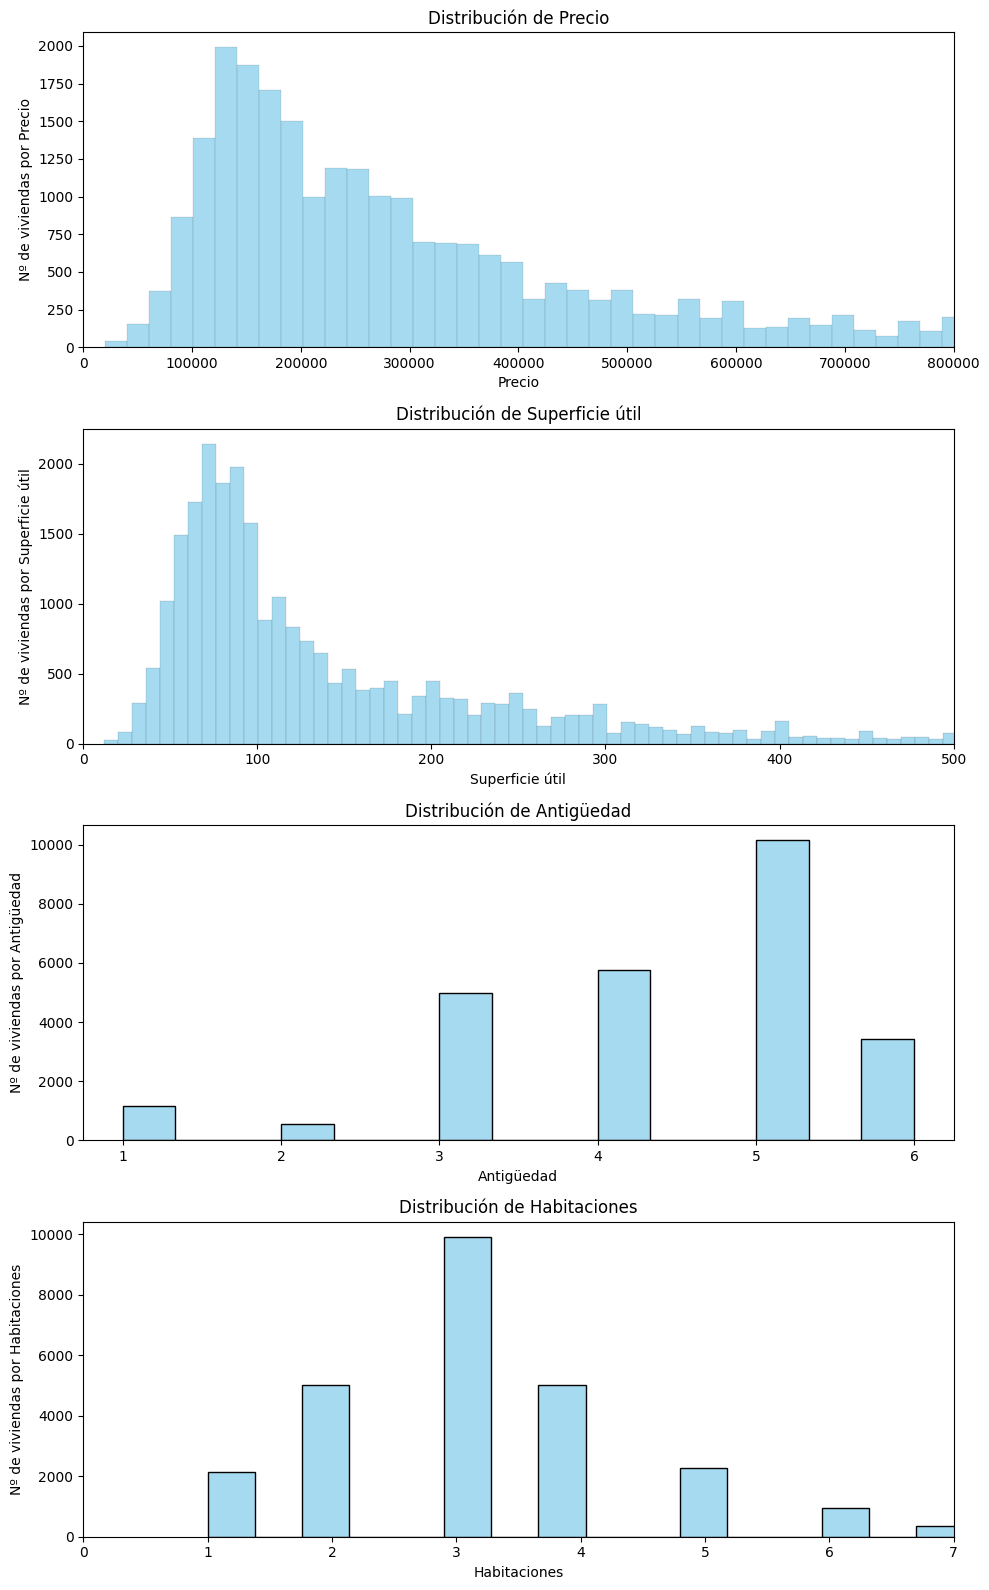

In [16]:
# Procedo a hacer distintos gráficos para ver la distribución de las viviendas según algunas variables importantes

variables = ['Precio', 'Superficie útil', 'Antigüedad', 'Habitaciones']

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 4 * len(variables)))

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_title(f"Distribución de {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')

    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.ticklabel_format(style='plain', axis='x') 

    # Hago diversos ajustes por variable para que las gráficas queden mejor
    if variable == 'Precio':
        sns.histplot(real_state['Precio'], ax=ax, color='#87CEEB')
        ax.set_xlim(0, 800000) 
        ax.set_ylabel("Nº de viviendas por Precio")

    elif variable == 'Superficie útil':
        sns.histplot(real_state['Superficie útil'], ax=ax, color='#87CEEB')
        ax.set_xlim(0, 500) 
        ax.set_ylabel("Nº de viviendas por Superficie útil")

    elif variable == 'Antigüedad':
        sns.histplot(real_state["Antigüedad"], bins=15, ax=ax, color='#87CEEB') 
        ax.set_ylabel("Nº de viviendas por Antigüedad")
    
    elif variable == 'Habitaciones':
        sns.histplot(real_state["Habitaciones"], bins=50, ax=ax, color='#87CEEB') 
        ax.set_xlim(0, 7) 
        ax.set_ylabel("Nº de viviendas por Habitaciones")

    else:
        sns.histplot(real_state[variable], ax=ax, color='#87CEEB')


plt.tight_layout()
plt.show()

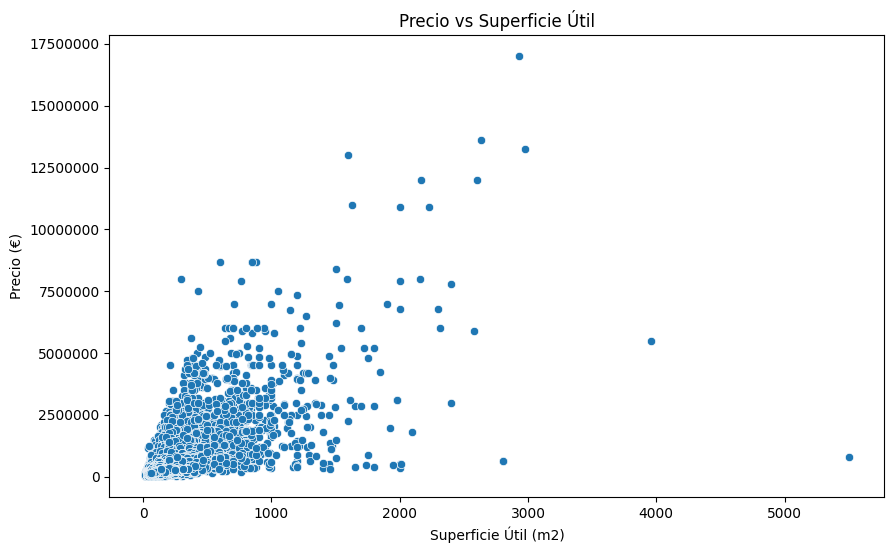

In [17]:
# Hago una gráfica para comparar precio y superficie útil
plt.figure(figsize=(10,6))

sns.scatterplot(x='Superficie útil', y='Precio', data=real_state)
plt.title('Precio vs Superficie Útil')
plt.xlabel('Superficie Útil (m2)')
plt.ylabel('Precio (€)')

plt.ticklabel_format(style='plain', axis='y') # Ajusto el eje Y para que no tenga Notación Científica
plt.show()

In [18]:
# A continuación, hago una escala comparando Precio/Distrito. Mencionar que, al haber tantos distritos, he preferido usar Plotly para hacer una gráfica interactiva, y así poder examinar los datos más fácilmente

fig = px.box(real_state, x='Distrito', y='Precio', title='Precio Medio por Distrito')
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)
fig.show()

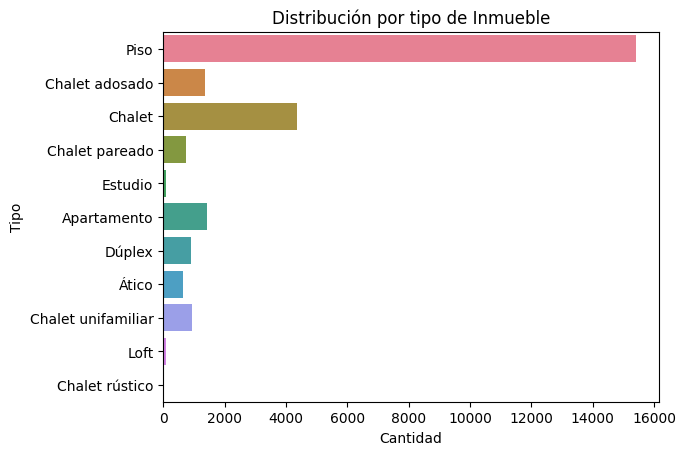

In [19]:
# Compruebo la distribución de viviendas por tipo

sns.countplot(y='Tipo', data=real_state, hue='Tipo')
plt.title('Distribución por tipo de Inmueble')
plt.xlabel('Cantidad')
plt.ylabel('Tipo')
plt.show()

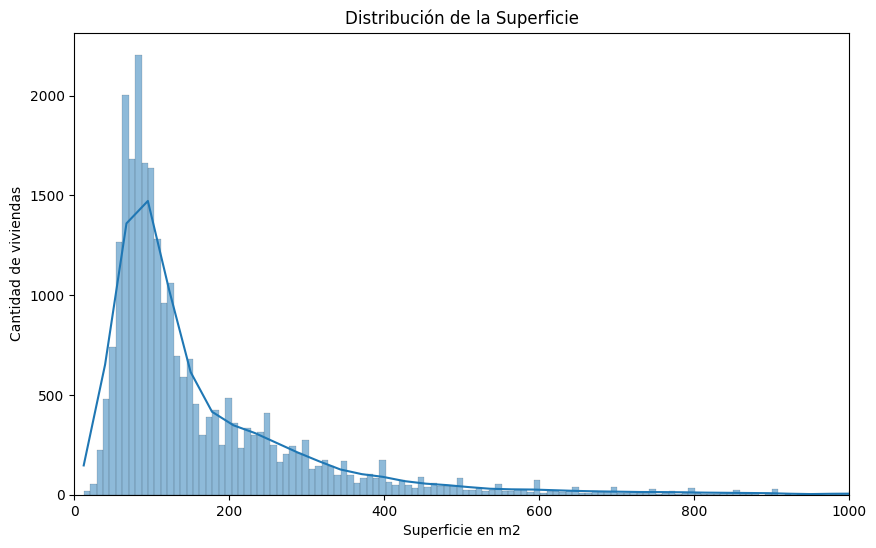

In [20]:
# Creo una gráfica que nos ponga la cantidad de viviendas por superficie en metros cuadrados 

plt.figure(figsize=(10, 6))
sns.histplot(data=real_state['Superficie'], kde=True)
plt.xlim(0, 1000)
plt.title('Distribución de la Superficie')
plt.xlabel('Superficie en m2')
plt.ylabel('Cantidad de viviendas')
plt.show()

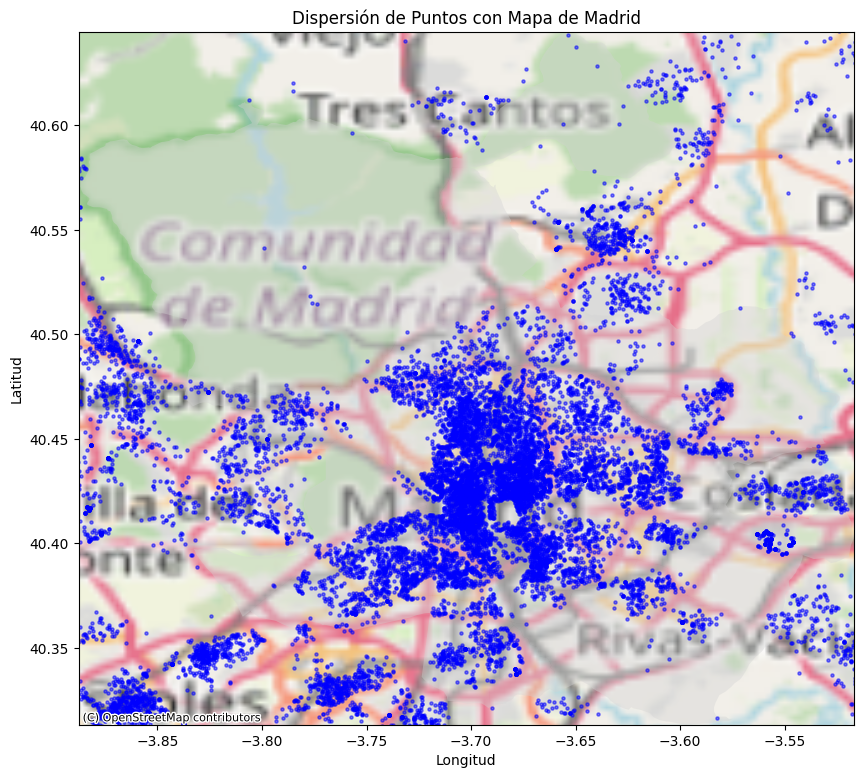

In [21]:
# Se hace un gráfico de puntos con el mapa de Madrid para mostrar las coordenadas de las viviendas

if 'Longitud' not in real_state.columns or 'Latitud' not in real_state.columns:
    raise ValueError("Las columnas 'Longitud' y 'Latitud' no se encuentran en el DataFrame")

real_state = real_state.dropna(subset=['Longitud', 'Latitud'])

map_path = 'c:/Users/Sora/Desktop/madrid_.geojson'

try:
    madrid_map = gpd.read_file(map_path)
except FileNotFoundError:
    raise FileNotFoundError(f"El archivo {map_path} no se encontró. Por favor, verifica la ruta")

gdf = gpd.GeoDataFrame(real_state, geometry=gpd.points_from_xy(real_state.Longitud, real_state.Latitud))

gdf.crs = 'EPSG:4326'
madrid_map = madrid_map.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(10, 10))
madrid_map.plot(ax=ax, alpha=0.4, color='lightgray')
gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_xlim(madrid_map.total_bounds[0],madrid_map.total_bounds[2])
ax.set_ylim(madrid_map.total_bounds[1], madrid_map.total_bounds[3])

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title("Dispersión de Puntos con Mapa de Madrid")

plt.show()

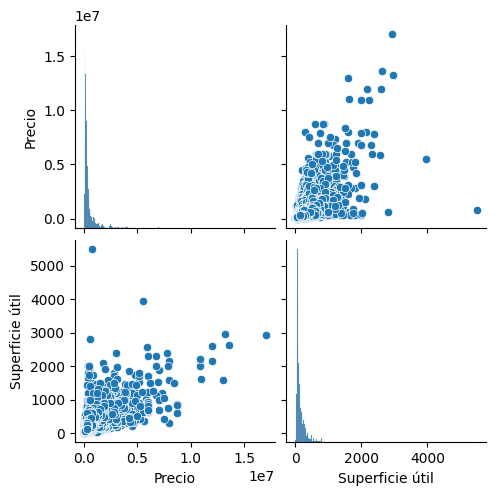

In [22]:
# Compruebo la correlación entre el precio y la superficie útil

sns.pairplot(real_state[['Precio', 'Superficie útil']])

plt.show()

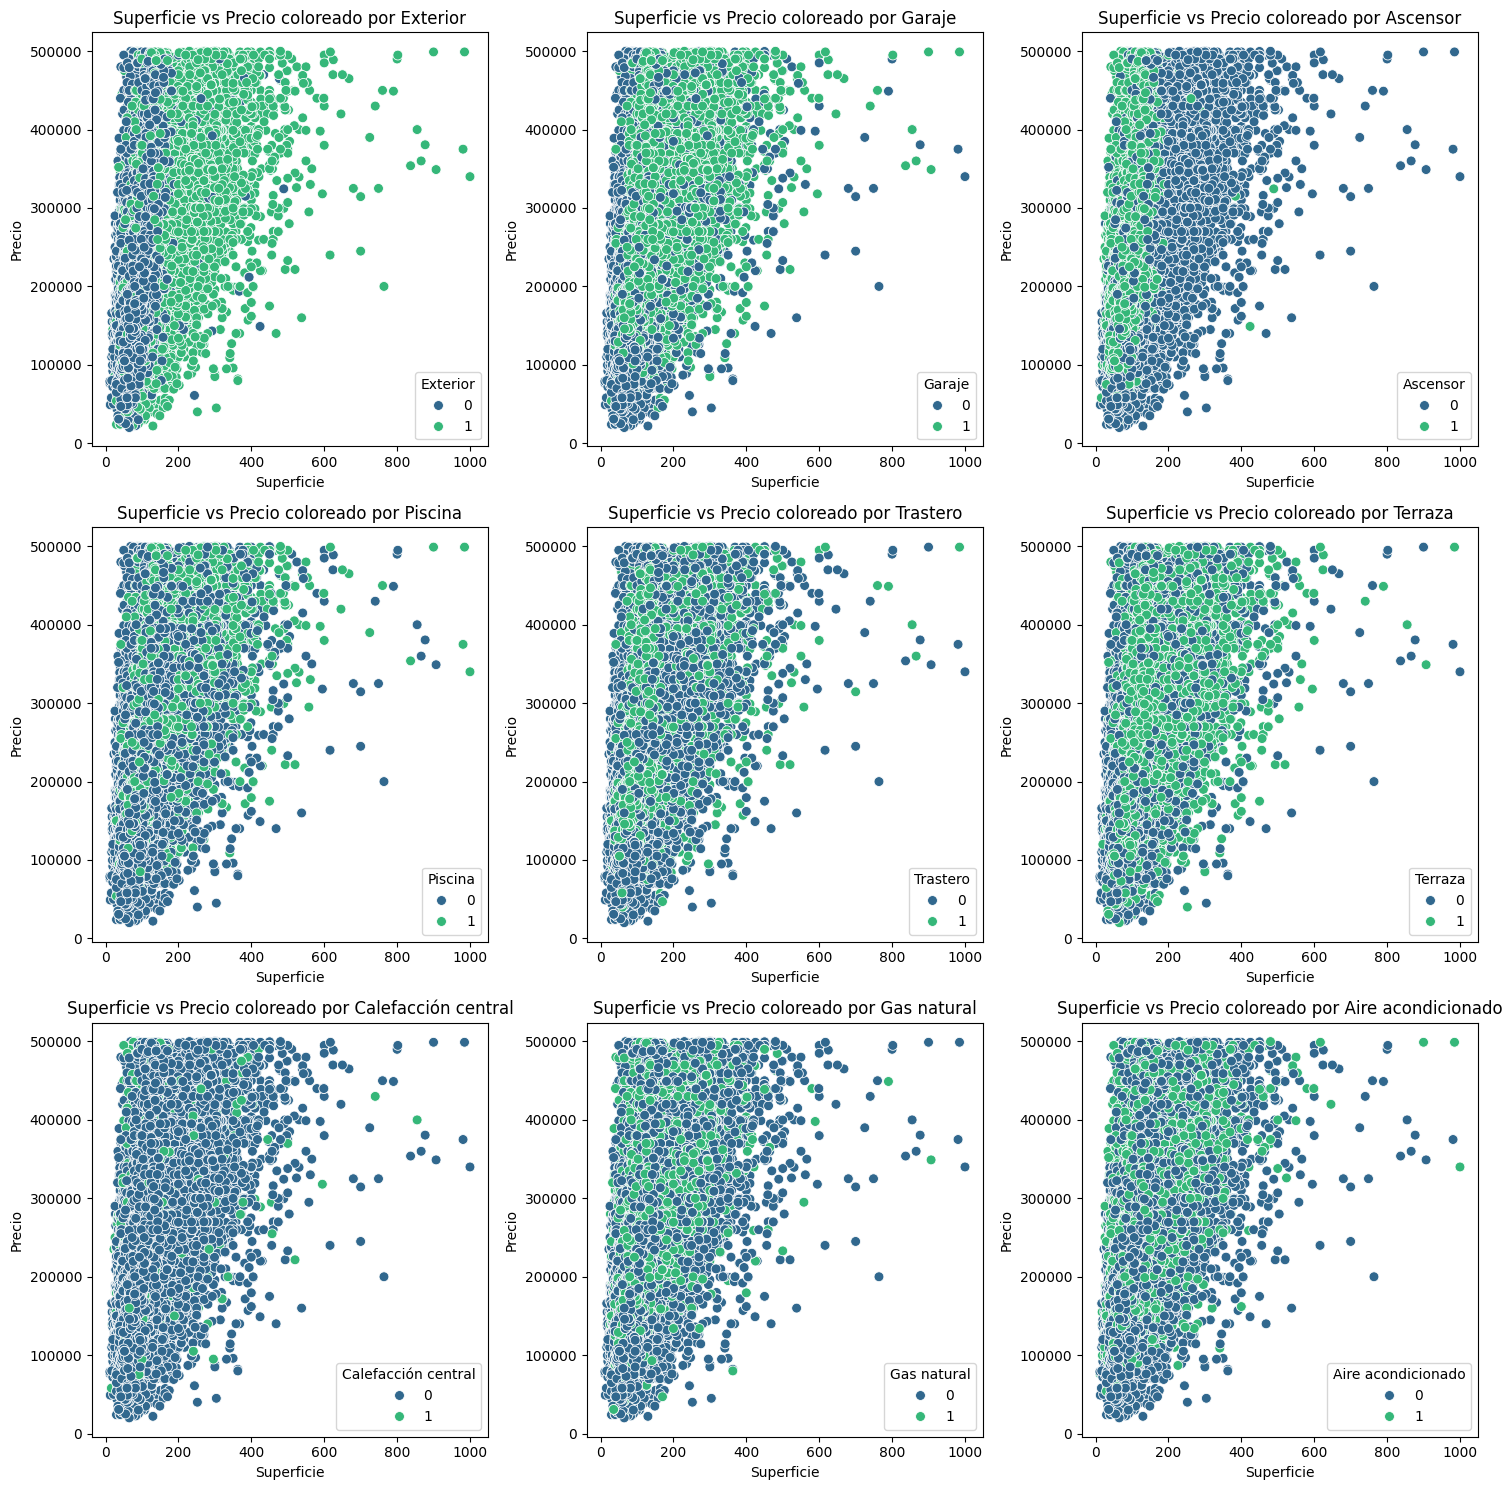

In [23]:
# Hago una correlación entre la superficie y otras variables para sacar posibles datos interesantes

real_state_filtered = real_state[(real_state['Superficie'] <= 1000) & (real_state['Precio'] < 500000)]

categorical_cols = ['Exterior', 'Garaje', 'Ascensor', 'Piscina', 'Trastero', 'Terraza', 'Calefacción central', 'Gas natural', 'Aire acondicionado']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_num = i % 3
    ax = axes[row, col_num]
    sns.scatterplot(x='Superficie', y='Precio', data=real_state_filtered, hue=col, ax=ax, palette='viridis', s=50)
    ax.set_title(f"Superficie vs Precio coloreado por {col}")
    ax.set_xlabel('Superficie')
    ax.set_ylabel('Precio')

plt.tight_layout()
plt.show()

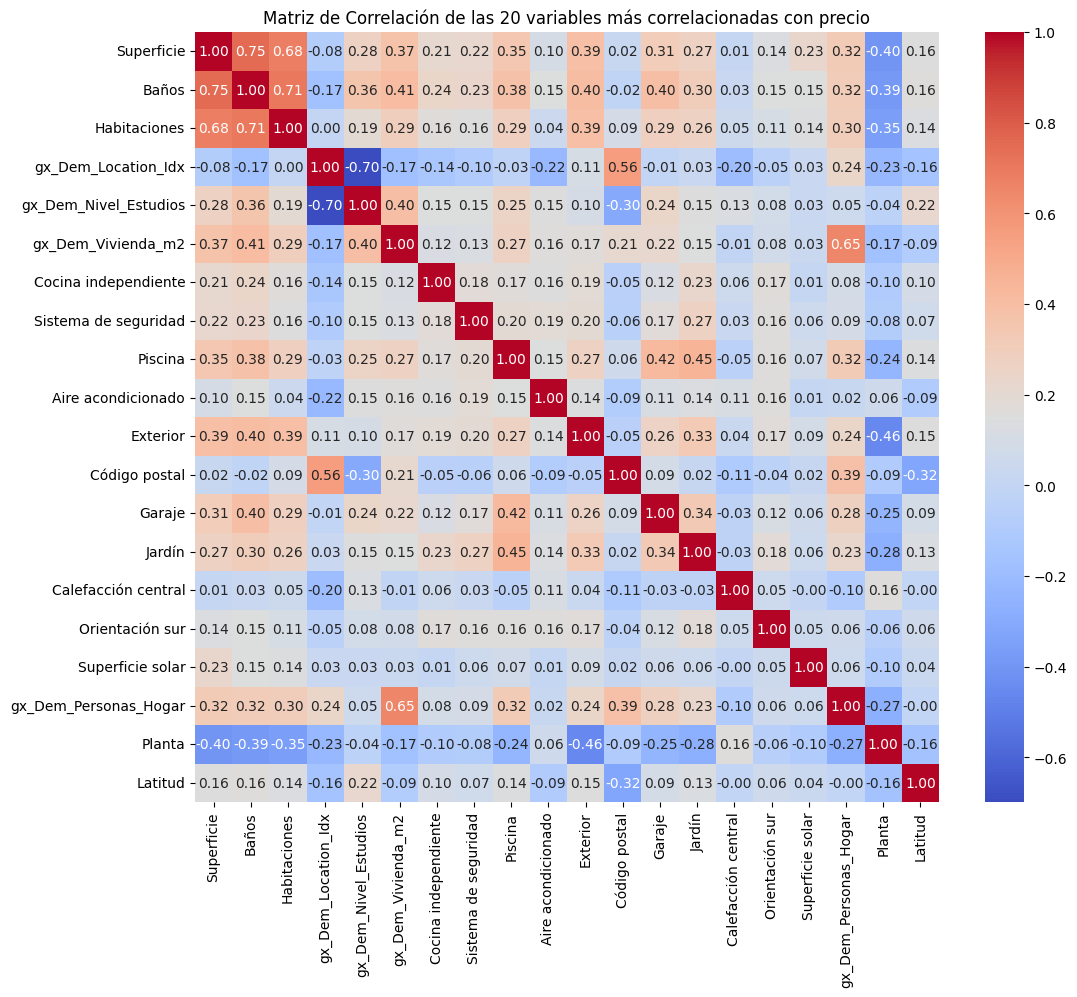

In [24]:
# Hago una correlación entre los datos para ver cuáles pueden resultar más importantes

numeric_data = real_state.select_dtypes(include=['float64', 'int64'])
excluded_columns = ['Precio_Var7', 'Precio_4L4r', 'Precio_xQ0N', 'Precio_pxHC', 'Superficie útil', 'Superficie_FXCm'] # Excluyo variables prescindibles como las variantes de precio o superficie
numeric_data = numeric_data.drop(columns=excluded_columns, errors='ignore')

correlation_matrix =numeric_data.corr()

top_20_corr = correlation_matrix['Precio'].abs().nlargest(21)[1:]

top_20_data = numeric_data[top_20_corr.index]

top_20_corr_matrix = top_20_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_20_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación de las 20 variables más correlacionadas con precio")
plt.show()

Análisis Exploratorio:

Distribución de Precio:
    -Como se puede apreciar, la mayoría de viviendas se encuentran en el rango de los 100k-200k euros
    -Exceptuando algunos casos raros, la superficie útil tiende a ser proporcional con el aumento de precio
    -Algunas de las viviendas más caras se encuentran en distritos cercanos al centro, como Salamanca, el Retiro, La Moraleja o Chamartín
    -Se puede observar un incremento de precio general en las viviendas con piscina, trastero y garaje
    -Las variables más relacionadas con el incremento del precio son las habitaciones, la superficie y el número de baños, mientras que la menos relacionada es el número de plantas

Otros datos interesantes:
    -La mayoría de viviendas tienen menos de 100m2 de superficie útil, 5 años de antigüedad y 3 habitaciones
    -La mayoría de inmuebles son pisos con amplia diferencia, siendo los segundos más comunes los chalets
    -La mayoría de viviendas se encuentran alrededor del centro de Madrid
    -Cuanto mayor es la superficie, más tienden a ser exteriores, tener garaje, NO tener ascensor y tener terraza

In [25]:
# Importaciones para el entrenamiento de modelos

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from warnings import filterwarnings

warnings = filterwarnings('ignore') # Quito los warnings para que quede todo más limpio

In [26]:
# Filtro por precio inferior a 600000€ para discriminar variables muy alejadas del común de los datos

real_state = real_state[real_state['Precio'] <= 600000] 

In [27]:
# Selecciono algunas columnas relativamente importantes y las guardo en un nuevo CSV

sel_cols = ['Precio', 'Tipo', 'Superficie', 'Habitaciones', 'Baños', 'Planta', 'Antigüedad', 

    'Clasificación', 'Distrito', 'Código postal', 'Nuevo', 

    'Reformado', 'Conservado', 'Exterior', 'Soleado', 'Amueblado', 'Cocina equipada', 

    'Garaje', 'Terraza', 'Ascensor', 'Aire acondicionado', 'Trastero', 'Puerta blindada', 

    'Piscina', 'Jardín', 'Gas natural', 'Aluminio', 'PVC', 'Climalit', 'Parquet', 'Gres', 

    'Tarima']

real_state_selected = real_state[sel_cols]
new_file_path = './Real_Estate_in_Madrid_Selected_Columns.csv'

real_state_selected.to_csv(new_file_path, index=False)

In [31]:
# Compruebo las variables nulas

print(real_state_selected.isnull().sum())

Precio                    0
Tipo                      0
Superficie                0
Habitaciones              0
Baños                     0
Planta                    0
Antigüedad                0
Clasificación             0
Distrito               4996
Código postal         10726
Nuevo                     0
Reformado                 0
Conservado                0
Exterior                  0
Soleado                   0
Amueblado                 0
Cocina equipada           0
Garaje                    0
Terraza                   0
Ascensor                  0
Aire acondicionado        0
Trastero                  0
Puerta blindada           0
Piscina                   0
Jardín                    0
Gas natural               0
Aluminio                  0
PVC                       0
Climalit                  0
Parquet                   0
Gres                      0
Tarima                    0
dtype: int64


In [32]:
# Relleno los nulos de Distrito y Código Postal

for column in ['Distrito', 'Código postal']:
    mode_value = real_state_selected[column].mode()[0]
    real_state_selected[column].fillna(mode_value, inplace=True)

In [33]:
label_encoders = {}
categorical_cols = real_state_selected.select_dtypes(include=['object']).columns

for col in categorical_cols:
    label_encoder = LabelEncoder()
    real_state_selected[col] = label_encoder.fit_transform(real_state_selected[col])
    label_encoders[col] = label_encoder

In [34]:
# Asigno las variables X e y para separar el precio del resto

X = real_state_selected.drop('Precio', axis=1)
y = real_state_selected['Precio']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [37]:
model = RandomForestRegressor(n_jobs=-1) # Me dice que variables son más importantes
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [38]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

features

Index(['Tipo', 'Superficie', 'Habitaciones', 'Baños', 'Planta', 'Antigüedad',
       'Clasificación', 'Distrito', 'Código postal', 'Nuevo', 'Reformado',
       'Conservado', 'Exterior', 'Soleado', 'Amueblado', 'Cocina equipada',
       'Garaje', 'Terraza', 'Ascensor', 'Aire acondicionado', 'Trastero',
       'Puerta blindada', 'Piscina', 'Jardín', 'Gas natural', 'Aluminio',
       'PVC', 'Climalit', 'Parquet', 'Gres', 'Tarima'],
      dtype='object')

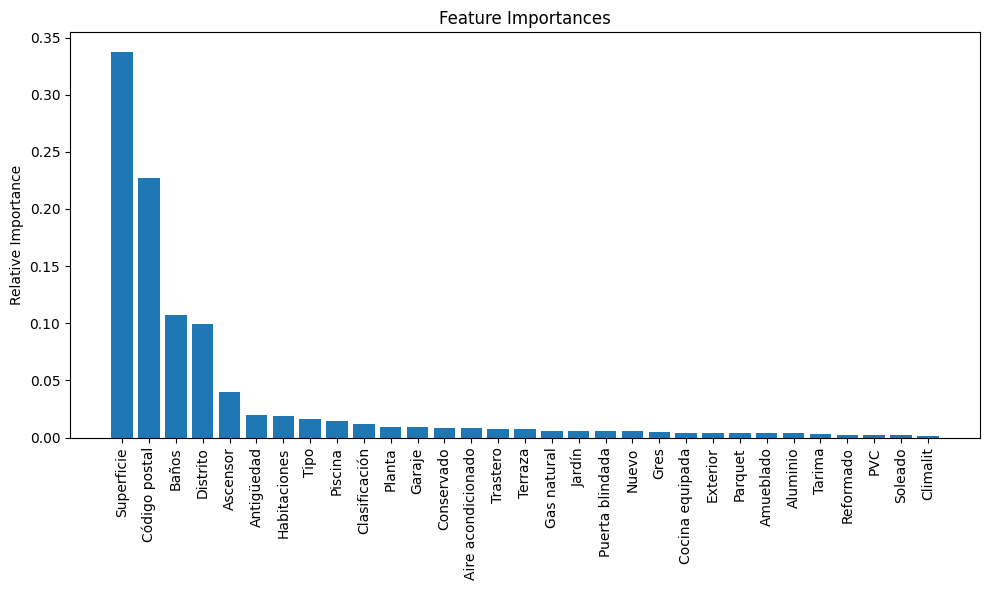

In [39]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.ylabel('Relative Importance')

plt.tight_layout()
plt.show()

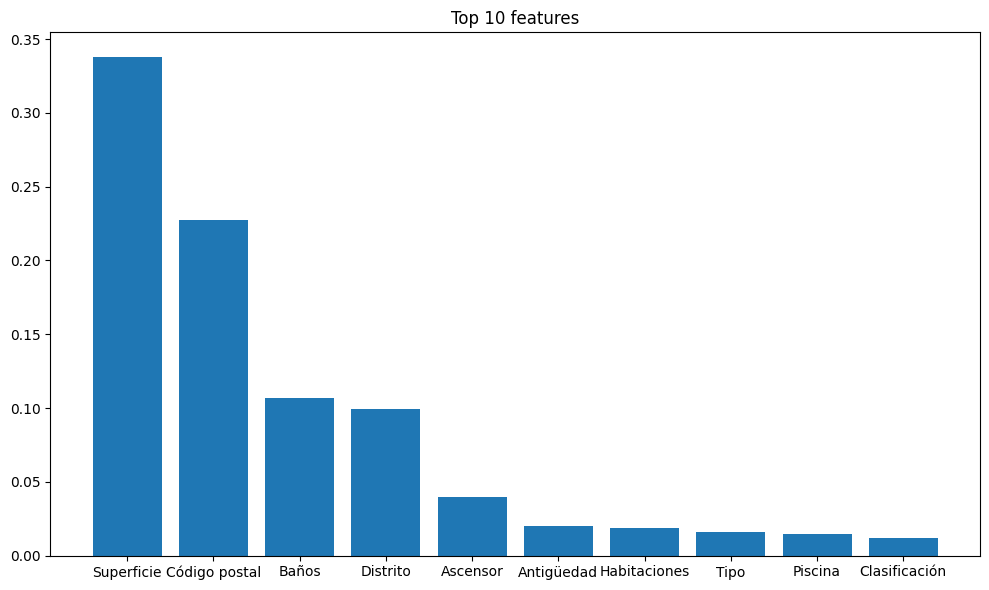

In [40]:
top_indices = indices[:10]
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 6))
plt.title('Top 10 features')
plt.bar(top_features, top_importances)
plt.tight_layout()
plt.show()

In [41]:
X_top = real_state_selected[top_features]

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.20, random_state=42)

In [42]:
# Voy a usar varios modelos con distintos hiperparámetros para intentar sacar los mejores resultados de cada uno y compararlos

models = {'Linear_Regression':LinearRegression(n_jobs=-1),
          'Decision_Tree': DecisionTreeRegressor(max_depth=12),
          'Random_Forest': RandomForestRegressor(n_estimators=170, max_depth=17, n_jobs=-1),
          'XGBoosting': XGBRegressor(n_estimators=77, max_depth=9, n_jobs=-1, learning_rate=0.3, min_child_weight=5),
          'LightGBM': LGBMRegressor(n_estimators=150, max_depth=17, n_jobs=-1, verbose=0),
          'Catboost': CatBoostRegressor(iterations=300, depth=11, learning_rate=0.3, l2_leaf_reg=7, verbose=0)
          }

In [43]:
results = {}
results_r2 = {}
results_mape = {}

for model_name, model in models.items():
    model.fit(X_train_top, y_train_top)
    y_pred = model.predict(X_test_top)
    mse = mean_squared_error(y_test_top, y_pred)
    rmse = np.sqrt(mse)
    results[model_name] = mse
    print(f"{model_name} RMSE: {rmse:.2f}")
    r2 = r2_score(y_test_top, y_pred)
    results_r2[model_name] = r2
    print(f"{model_name} R2: {r2:.2f}")
    mape = np.mean(np.abs((y_test_top - y_pred) / y_test_top)) * 100
    results_mape[model_name] = mape
    print(f"{model_name} MAPE: {mape:.2f}%")


Linear_Regression RMSE: 101801.71
Linear_Regression R2: 0.39
Linear_Regression MAPE: 36.43%
Decision_Tree RMSE: 78117.14
Decision_Tree R2: 0.64
Decision_Tree MAPE: 25.29%
Random_Forest RMSE: 63319.49
Random_Forest R2: 0.76
Random_Forest MAPE: 20.81%
XGBoosting RMSE: 62534.93
XGBoosting R2: 0.77
XGBoosting MAPE: 20.60%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
LightGBM RMSE: 61296.30
LightGBM R2: 0.78
LightGBM MAPE: 21.06%
Catboost RMSE: 61354.39
Catboost R2: 0.78
Catboost MAPE: 20.36%


               Model           RMSE
0  Linear_Regression 10363587501.33
1      Decision_Tree  6102287394.62
2      Random_Forest  4009357500.90
3         XGBoosting  3910617830.21
4           LightGBM  3757236662.53
5           Catboost  3764361102.21


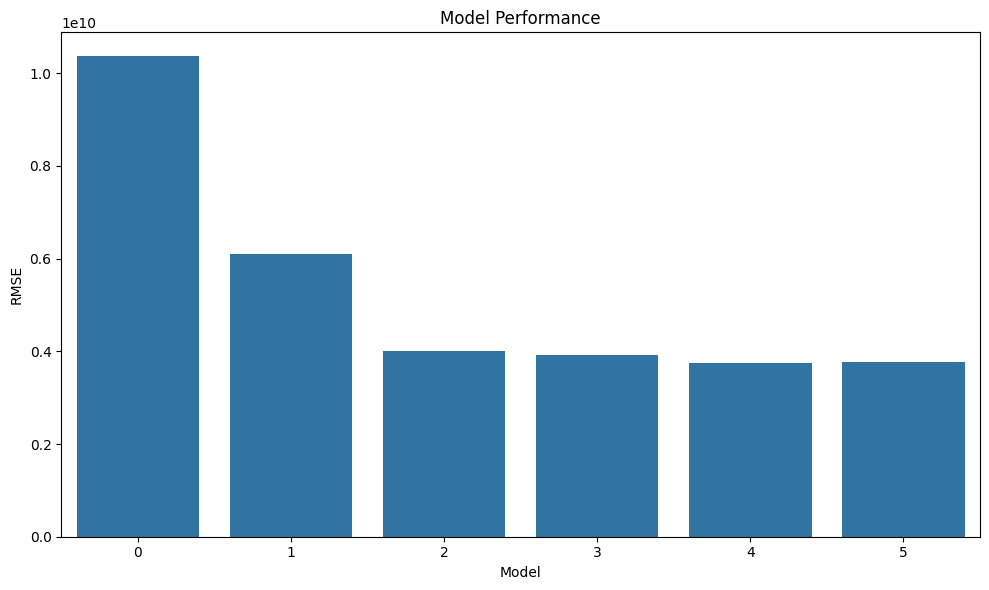

In [44]:
# Compruebo en una tabla los modelos

results_real_state = pd.DataFrame(results.items(), columns=['Model', 'RMSE'])
results_real_state.sort_values(by='RMSE')
print(results_real_state)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_real_state.index, y='RMSE', data=results_real_state)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance')
plt.tight_layout()
plt.show()

In [47]:
# Comparo los resultados

results_real_state = pd.DataFrame({'Actual': y_test_top, 'Predicted': y_pred}).reset_index(drop=True)
print(results_real_state.head())

   Actual  Predicted
0  239000  250944.84
1  122260  131964.19
2  335000  323075.49
3  183000  165897.67
4  180000  170002.03


<Axes: xlabel='Actual', ylabel='Predicted'>

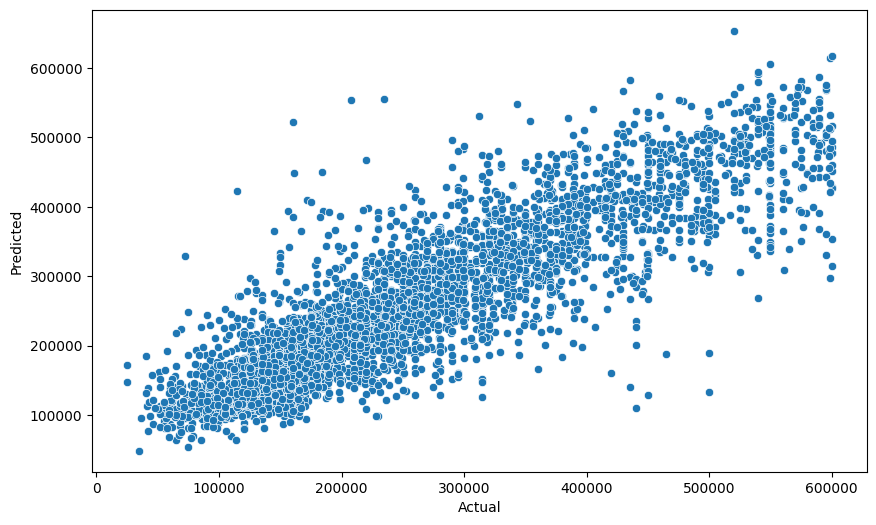

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_real_state)

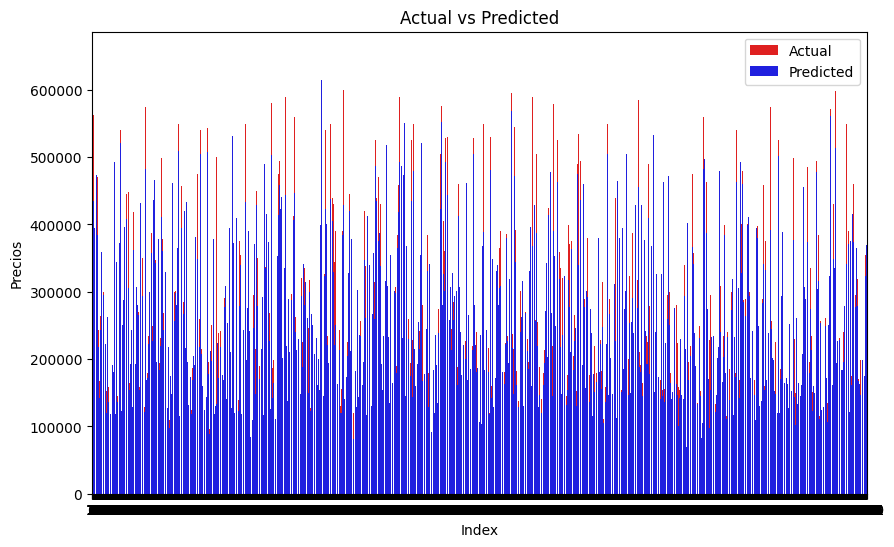

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_real_state.index, y='Actual', data=results_real_state, color='red', label='Actual')
sns.barplot(x=results_real_state.index, y='Predicted', data=results_real_state, color='blue', label='Predicted')
plt.title('Actual vs Predicted')
plt.ylabel('Precios')
plt.xlabel('Index')
plt.legend()
plt.show()

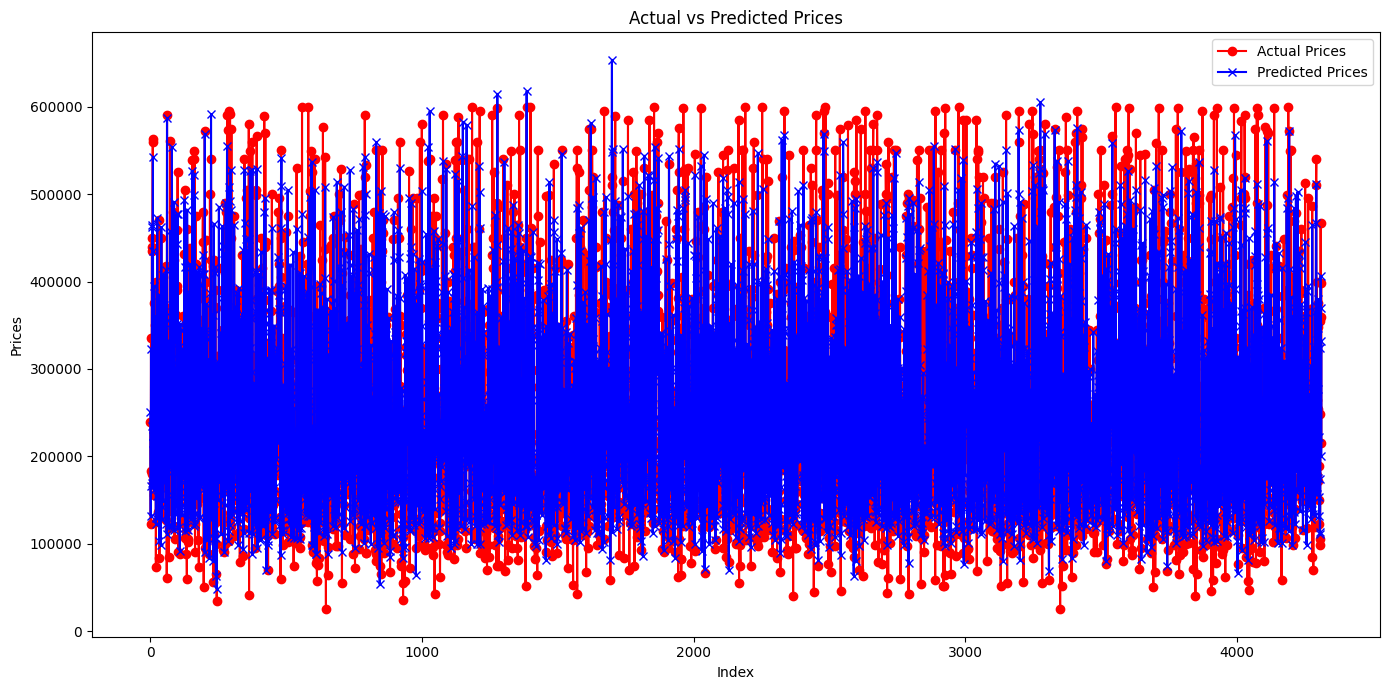

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(results_real_state['Actual'], label='Actual Prices', color='red', linestyle='-', marker='o')
plt.plot(results_real_state['Predicted'], label='Predicted Prices', color='blue', linestyle='-', marker='x')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Conclusiones

De este entrenamiento se pueden sacar varias conclusiones.
En todos los modelos he puesto hiperparámetros que, tras probar varias veces, creo que son algunos de los mejores. Como se puede observar, el LinearRegressor es el que peor precisión tiene, seguido del Decission Tree y luego los demás presentan unos resultados bastante parecidos, siendo que LightGBM y Catboost parecen ser ligeramente mejores que el resto en este entrenamiento.
Además, se puede observar que Linear Regression es el único modelo que no llega al 0,5 de R2, es interesante comprobar que ningún modelo llega a reducir el MAPE por menos del 20%, siendo Random Forest, XGBoost y Catboost los que se encuentran en el rango del 20%, con un 20.81%, un 20.60%  y un 20.36% respectivamente. Es posible que, con más tiempo, y alternando más los hiperparámetros, se pudiera alcanzar un valor inferior a 20%. 

In [51]:
# Importaciones para clasificación

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Transformo los precios en rangos de precio

bins = [0, 100000, 200000, 300000, 600000, float('inf')] 
labels = ['Bajo', 'Medio Bajo', 'Medio', 'Medio Alto', 'Alto']

real_state_selected['Price_Range'] = pd.cut(real_state_selected['Precio'], bins=bins, labels=labels, right=False)

In [53]:
X = real_state_selected.drop(columns=['Precio', 'Price_Range'])
y = real_state_selected['Price_Range']

In [54]:
# Escalamiento de características

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_top, X_test, y_train_top, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Divido el dataset en entrenamiento y prueba

In [55]:
# Configuro los modelos, hago el entrenamiento y muestro los resultados

K = 13
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=K)
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=15)
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=17, n_estimators=200)

models = {'KNN': knn, 'Decision Tree': decision_tree, 'Random Forest': random_forest}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train_top, y_train_top)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print('{} Accuracy: {:.2f}%'.format(name, accuracy * 100))

KNN Accuracy: 59.16%
Decision Tree Accuracy: 68.27%
Random Forest Accuracy: 72.19%


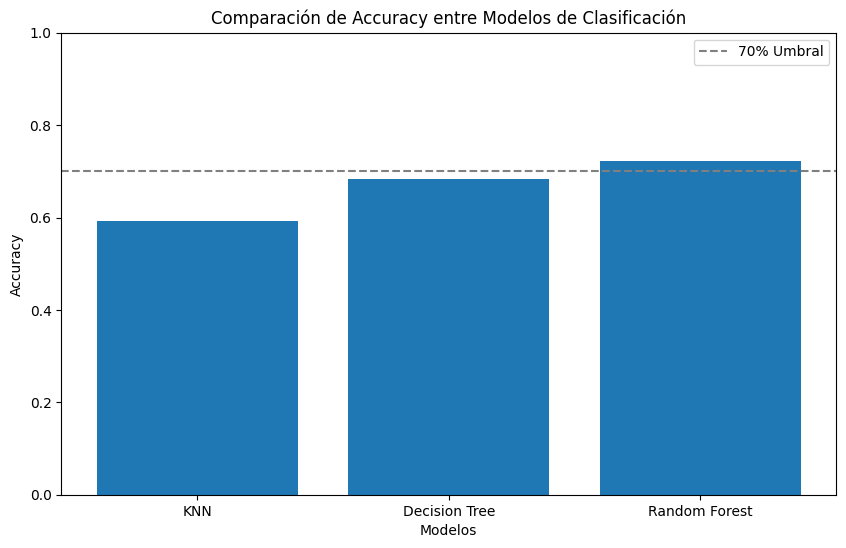

In [58]:
accuracy_real_state = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])
accuracy_real_state.sort_values(by='Accuracy')

# Crear una lista con los nombres de los modelos y sus accuracies
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos de Clasificación')
plt.ylim(0, 1)  # Para mostrar la escala de 0 a 1
plt.axhline(y=0.70, color='gray', linestyle='--', label='70% Umbral')
plt.legend()

# Mostrar la gráfica
plt.show()

# Conclusiones de la Clasificación

Como se puede observar, tras modificar los hiperparámetros varias veces, el único modelo que llega a superar el Accuracy del 70% es el Random Forest, siendo que el Decision Tree se acerca bastante con un 68.27%.